In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
df = pd.read_csv('myopia.csv')
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
df.drop(columns ='MYOPIC', inplace=True)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [19]:
X_scaled.shape

(618, 14)

### Reduce dataset dimensions with PCA

In [6]:
pca = PCA(n_components=.9)
pca.fit(X_scaled)
principal_components = pca.transform(X_scaled)
principal_components.shape

(618, 10)

In [7]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [9]:
tsne = TSNE(perplexity=50)
features = tsne.fit_transform(principal_components)
features.shape

(618, 2)

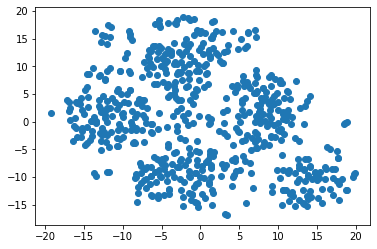

In [11]:
plt.scatter(features[:,0], features[:,1])


In [12]:
inertia = list()
k = list(range(1,9))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(principal_components)
    inertia.append(km.inertia_)
    
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})

Text(0.5, 1.0, 'Elbow Plot')

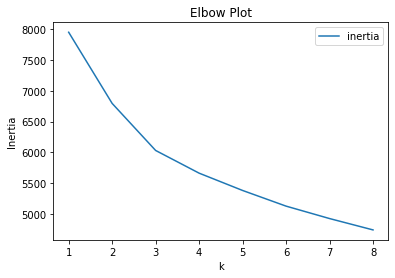

In [14]:
elbow_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')

According to the analysis, there seems to be anywhere between 3 and 5 clusters